<a href="https://colab.research.google.com/github/Archita0304/DeepLearning/blob/main/DL_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the path to the image: /content/cats-and-dogs.jpg
Enter your question about the image: describe the image


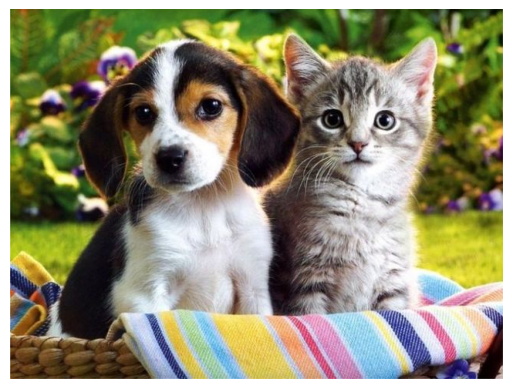

Answer: cat and dog


In [2]:
import torch
from transformers import BlipProcessor, BlipForQuestionAnswering
from PIL import Image
import matplotlib.pyplot as plt

def load_image(image_path):
    image = Image.open(image_path).convert("RGB")

    # Show the image
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    return image

def main():
    # Load the BLIP processor and model from Hugging Face
    processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
    model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")

    image_path = input("Enter the path to the image: ")
    question = input("Enter your question about the image: ")

    image = load_image(image_path)
    inputs = processor(text=question, images=image, return_tensors="pt", padding=True)

    with torch.no_grad():
        outputs = model.generate(**inputs)

    answer = processor.decode(outputs[0], skip_special_tokens=True)
    print(f"Answer: {answer}")

if __name__ == "__main__":
    main()
